# Práctica 3

### General

In [2]:
# Carga de librerías necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['text.usetex'] = True

from IPython.display import display

from colorama import Fore, Back, Style # Colores en el output

In [3]:
def Title(msg):
    return Style.BRIGHT + Fore.BLACK + Back.WHITE + msg + Style.RESET_ALL

def Error(msg):
    return Style.BRIGHT + Fore.RED + msg + Style.RESET_ALL

### Ejercicio 2

A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

In [4]:
from scipy.optimize import fsolve

# De los apuntes (solo como referencia)
def euler_explicito(f, a, b, mu, N):
    """
    Método de Euler explícito para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros((N + 1,))
    x[0] = mu
    for n in range(N):
        x[n + 1] = x[n] + h * f(t[n], x[n])
    return t, x

def euler_implicito(f, a, b, mu, N):
    """
    Método de Euler implícito para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros(N + 1)
    x[0] = mu
    # x1 = sp.symbols('x1')
    for n in range(N):
        # x[n + 1] = np.float64(sp.solve(x[n]+h*f(t[n+1],x1)-x1,x1)[0])
        x[n + 1] = fsolve(lambda x1: x[n] + h * f(t[n + 1], x1) - x1, x[n])[0]
    return t, x

# A partir de aquí código propio

# Punto medio
def euler_mejorado(f, a, b, mu, N):
    """
    Método de Euler mejorado para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros(N + 1)
    x[0] = mu
    # x1 = sp.symbols('x1')
    for n in range(N):
        x[n + 1] = x[n] + h*f(t[n]+(h/2), x[n]+(h/2)*f(t[n],x[n]))
    return t, x

# Heun
def euler_modificado(f, a, b, mu, N):
    """
    Método de Euler modificado para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros(N + 1)
    x[0] = mu
    # x1 = sp.symbols('x1')
    for n in range(N):
        x[n + 1] = x[n] + (h/2)*(f(t[n],x[n])+f(t[n+1],x[n]+h*f(t[n],x[n])))
    return t, x

# Calcular la solución exacta (como se hace en los apuntes)
def solucion_exacta(f,a,b,mu,N):
	"""
		Cálculo de la solución exacta para la ecuación diferencial
		x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
		con N puntos.
	"""
	t, x0 = sp.symbols('t,x0')
	x = sp.Function('x')
	edo = x(t).diff(t)-f(t,x(t))
	edo_sol = sp.dsolve(edo)
	ics = {x(0): x0}
	CI_eq = sp.Eq(edo_sol.lhs.subs({t: 0}).subs(ics), edo_sol.rhs.subs({t: 0}))
	CI_sol = sp.solve(CI_eq)[0]
	edo_sol_part = edo_sol.subs(CI_sol)
	sol_exacta = edo_sol_part.rhs.subs({x0:mu})
	sol_exacta_np = sp.lambdify(t, sol_exacta, 'numpy')
    
	t_values = np.linspace(a, b, N) # así obtendríamos el array de abcisas
	x_values = sol_exacta_np(t_values) # y el de ordenadas
  
	return t_values, x_values, sol_exacta_np

In [5]:
def grafica_comparativa(lista_resultados, width=8, height=4, title=r"Comparación de funciones", x_min=None, x_max=None, y_min=None, y_max=None):
	"""
	Imprime los resultados de lista_resultados. Cada elemento tendrá que ser un diccionario que contenga:
		x_values: lista de valores de abscisas
		y_values: lista de valores de ordenadas
		label: etiqueta de la función (para la leyenda)
		style: estilo para display
	"""

	fig, ax = plt.subplots(figsize=(width, height))

	for l in lista_resultados:
			ax.plot(l["x_values"], l["y_values"], l["style"],label = l["label"])

	ax.set_title(title, fontsize=18)
	ax.set_xlabel(r"$t$", fontsize=18)
	ax.set_ylabel(r"$x$", fontsize=18)

	# Limitar el eje x si se especifica
	if x_min is not None and x_max is not None:
		ax.set_xlim(x_min, x_max)

	# Limitar el eje y si se especifica
	if y_min is not None and y_max is not None:
		ax.set_ylim(y_min, y_max)
	
	ax.legend()
	fig.tight_layout()

Prueba de las funciones de Euler: 

Método de Euler explícito: 
[1.         1.1        1.21       1.331      1.4641     1.61051
 1.771561   1.9487171  2.14358881 2.35794769 2.59374246]


Método de Euler implícito: 
[1.         1.11111111 1.2345679  1.37174211 1.5241579  1.69350878
 1.88167642 2.09075158 2.32305731 2.58117479 2.86797199]


Método de Euler mejorado: 
[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]


Método de Euler modificado: 
[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]


Solución exacta: 
[1.         1.10517092 1.22140276 1.34985881 1.4918247  1.64872127
 1.8221188  2.01375271 2.22554093 2.45960311 2.71828183]



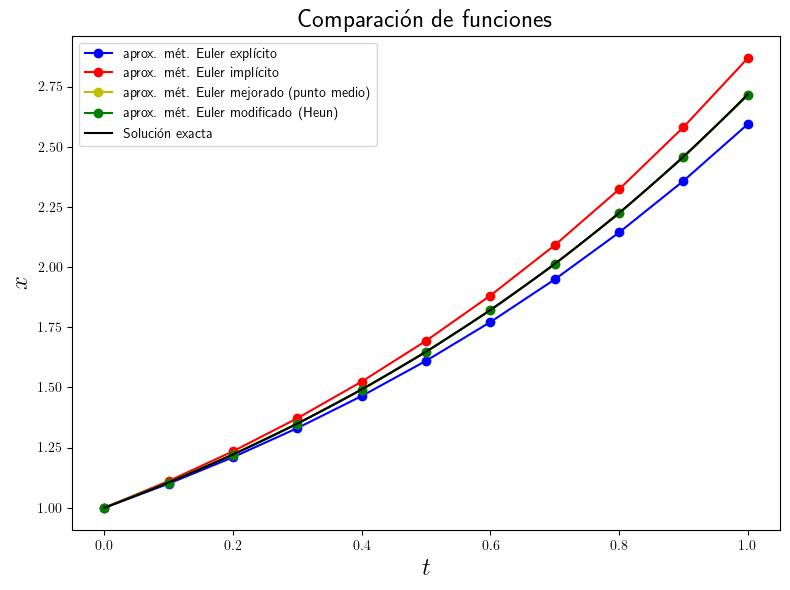

In [6]:
# Probamos las funciones recién desarrolladas
a,b = 0,1   # Extermos inferior y superior del intervalo
mu = 1      # Consición inicial del PVI
N = 10

num_puntos = 100 # Puntos para graficar la solución exacta

# Definimos la función f
def f(t,x):
    return x

# Calculo la solución exacta (como se hace en los apuntes)
t_values_exac, x_values_exac, sol_exacta_np = solucion_exacta(f,a,b,mu,num_puntos)

# Calculo las aproximaciones
t_values_Eulerexpl, x_values_Eulerexpl = euler_explicito(f,a,b,mu,N)
t_values_Eulerimpl, x_values_Eulerimpl = euler_implicito(f,a,b,mu,N)
t_values_Eulermej, x_values_Eulermej = euler_mejorado(f,a,b,mu,N)
t_values_Eulermod, x_values_Eulermod = euler_modificado(f,a,b,mu,N)

print(Title(f"Prueba de las funciones de Euler: "))

print(f"\nMétodo de Euler explícito: ")
print(f"{x_values_Eulerexpl}\n")

print(f"\nMétodo de Euler implícito: ")
print(f"{x_values_Eulerimpl}\n")

print(f"\nMétodo de Euler mejorado: ")
print(f"{x_values_Eulermej}\n")

print(f"\nMétodo de Euler modificado: ")
print(f"{x_values_Eulermod}\n")

print(f"\nSolución exacta: ")
# La muestro solo en los mismos puntos que las otras (para comparar)
print(f"{sol_exacta_np(t_values_Eulerexpl)}\n") 

# Grafico los resultados
euler_expl = {"x_values" : t_values_Eulerexpl,
             "y_values" : x_values_Eulerexpl,
             "label" : "aprox. mét. Euler explícito",
             "style": 'bo-'}

euler_impl = {"x_values" : t_values_Eulerimpl,
             "y_values" : x_values_Eulerimpl,
             "label" : "aprox. mét. Euler implícito",
             "style": 'ro-'}

euler_mej = {"x_values" : t_values_Eulermej,
             "y_values" : x_values_Eulermej,
             "label" : "aprox. mét. Euler mejorado (punto medio)",
             "style": 'yo-'}

euler_mod = {"x_values" : t_values_Eulermod,
             "y_values" : x_values_Eulermod,
             "label" : "aprox. mét. Euler modificado (Heun)",
             "style": 'go-'}

exacta = {"x_values" : t_values_exac,
             "y_values" : x_values_exac,
             "label" : "Solución exacta",
             "style": 'k'}

grafica_comparativa([euler_expl, euler_impl, euler_mej, euler_mod, exacta], 8, 6)

Se puede observar que los 2 últimos métodos están mucho más cerca de la solución exacta

### Ejercicio 4

Programe el método de Runge-Kutta de 4 evaluaciones y grafique la sucesión de aproximaciones y calcule el error cuadrático medio y el máximo error absoluto con respecto a la solución exacta.

In [7]:
def RK2(f, a, b, mu, N, alpha=0.5, beta=1):
	"""
	Método de Runge-Kutta de orden 2 para resolver la ecuación diferencial
	x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
	con N pasos.
	"""
	h = (b - a) / N
	t_values = np.linspace(a, b, N + 1)
	x_values = np.zeros(N + 1)
	x_values[0] = mu
	for n in range(N):
			K1 = f(t_values[n], x_values[n])
			K2 = f(t_values[n] + beta * h, x_values[n] + beta * h * K1)
			x_values[n + 1] = x_values[n] + h * ((1-alpha)*K1 + alpha*K2)
	return t_values, x_values

def RK4(f, a, b, mu, N):
	"""
	Método de Runge-Kutta de orden 4 para resolver la ecuación diferencial
	x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
	con N pasos.
	"""
	h = (b - a) / N
	t_values = np.linspace(a, b, N + 1)
	x_values = np.zeros(N + 1)
	x_values[0] = mu
	for n in range(N):
		K1 = f(t_values[n], x_values[n])
		K2 = f(t_values[n] + (h/2), x_values[n] + (h/2)*K1)
		K3 = f(t_values[n] + (h/2), x_values[n] + (h/2)*K2)
		K4 = f(t_values[n] + h, x_values[n] + h*K3)
			
		x_values[n +1 ] = x_values[n] + (h/6)*(K1+2*K2+2*K3+K4)
	return t_values, x_values

In [8]:
# Error cuadrático medio
def ECM(a,b): 
	res = 0

	for i in range(len(a)):
		res += (a[i]-b[i])**2
	
	return (res/len(a))

# Máximo error absoluto
def MEA(a,b):
	error_abs = np.zeros(len(a))
  
	for i in range (len(a)):
		error_abs[i] = abs(a[i] - b[i])
  
	return max(error_abs)

Prueba de las funciones de Runge-Kutta: 

Método de Runge-Kutta de orden 2: 
[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]
	Error cuadrático medio: 4.324701200821029e-06
	Máximo error absoluto: 0.004200981850821073


Método de Runge-Kutta de orden 4: 
[1.         1.10517083 1.22140257 1.3498585  1.49182424 1.64872064
 1.82211796 2.01375163 2.22553956 2.45960141 2.71827974]
	Error cuadrático medio: 1.0643544715729965e-12
	Máximo error absoluto: 2.0843238792700447e-06


Solución exacta: 
[1.         1.10517092 1.22140276 1.34985881 1.4918247  1.64872127
 1.8221188  2.01375271 2.22554093 2.45960311 2.71828183]



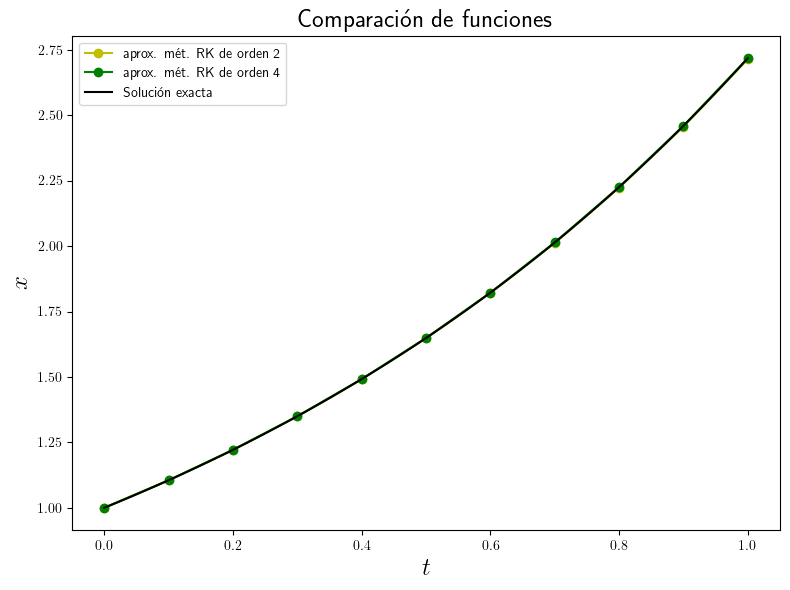

In [9]:
# Probamos las funciones anteriores (mismo problema del ejercicio anterior):
a,b = 0,1   # Extermos inferior y superior del intervalo
mu = 1      # Consición inicial del PVI
N = 10

alpha = 1
beta = 1/2

num_puntos = 100 # Puntos para graficar la solución exacta

# Definimos la función f
def f(t,x):
    return x

# Calculo la solución exacta:
t_values_exac, x_values_exac, sol_exacta_np = solucion_exacta(f,a,b,mu,num_puntos)

# Calculo las aproximaciones
t_values_RK2 , x_values_RK2 = RK2(f,a,b,mu,N,alpha=alpha,beta=beta)
t_values_RK4 , x_values_RK4 = RK4(f,a,b,mu,N)

x_values_exac_N = sol_exacta_np(t_values_RK2)

print(Title(f"Prueba de las funciones de Runge-Kutta: "))

print(f"\nMétodo de Runge-Kutta de orden 2: ")
print(f"{x_values_RK2}")
print(f"\tError cuadrático medio: {ECM(x_values_exac_N, x_values_RK2)}")
print(f"\tMáximo error absoluto: {MEA(x_values_exac_N, x_values_RK2)}\n")

print(f"\nMétodo de Runge-Kutta de orden 4: ")
print(f"{x_values_RK4}")
print(f"\tError cuadrático medio: {ECM(x_values_exac_N, x_values_RK4)}")
print(f"\tMáximo error absoluto: {MEA(x_values_exac_N, x_values_RK4)}\n")

print(f"\nSolución exacta: ")
print(f"{sol_exacta_np(t_values_RK2)}\n")

RK_2 = {"x_values" : t_values_RK2,
             "y_values" : x_values_RK2,
             "label" : "aprox. mét. RK de orden 2",
             "style": 'yo-'}

RK_4 = {"x_values" : t_values_RK4,
             "y_values" : x_values_RK4,
             "label" : "aprox. mét. RK de orden 4",
             "style": 'go-'}

exacta = {"x_values" : t_values_exac,
             "y_values" : x_values_exac,
             "label" : "Solución exacta",
             "style": 'k'}

grafica_comparativa([RK_2, RK_4, exacta], 8, 6)

### Ejercicio 5

Se pretende aproximar la solución del PVI:
$$
\left\{\begin{array}{rcl}
x'(t) &=& \dfrac{t-x(t)} 2 \\
x(0) &=& 1
\end{array}\right..
$$
en $[0,3]$
1. Usa el método de Runge-Kutta de 2 evaluaciones con $\alpha= 3/4$ y $\beta=2/3$ para $h = 1$, $h = 1/2$, $h = 1/4$ y $h = 1/8$ y compara los resultados obtenidos.
2. Repite el apartado anterior usando Runge-Kutta clásico.

Nota: La solución exacta es $x(t) = 3 e^{-t/2} + t -2$.

In [10]:
# Definimos el problema 
a,b = 0,3   # Extremos inferior y superior del intervalo
mu = 1      # Condición inicial del PVI  

# Definimos la función f
def f(t,x):
    return (t-x)/2

#### Apartado 1

Prueba de la función de Runge-Kutta de orden 2: 

Método de Runge-Kutta de orden 2 para h = 1.0: 
[1.         0.875      1.171875   1.73242188]
	Error cuadrático medio: 0.002924812373294217
	Máximo error absoluto: 0.068236676485673


Método de Runge-Kutta de orden 2 para h = 0.5: 
[1.         0.84375    0.83105469 0.93051147 1.11758709 1.37311491
 1.68212103]
	Error cuadrático medio: 0.00012955251073372697
	Máximo error absoluto: 0.013948766024247217


Método de Runge-Kutta de orden 2 para h = 0.25: 
[1.         0.8984375  0.83807373 0.81408072 0.82219626 0.85865763
 0.92014307 1.00372005 1.10679973 1.22709664 1.36259313 1.51150799
 1.67226878]
	Error cuadrático medio: 6.865942432695995e-06
	Máximo error absoluto: 0.00316140872783377


Método de Runge-Kutta de orden 2 para h = 0.125: 
[1.         0.94335938 0.89771652 0.86240556 0.83680093 0.82031493
 0.81239547 0.81252387 0.82021286 0.83500466 0.85646922 0.88420253
 0.91782503 0.95698016 1.00133292 1.05056862 1.10439162 1.16252416
 1.

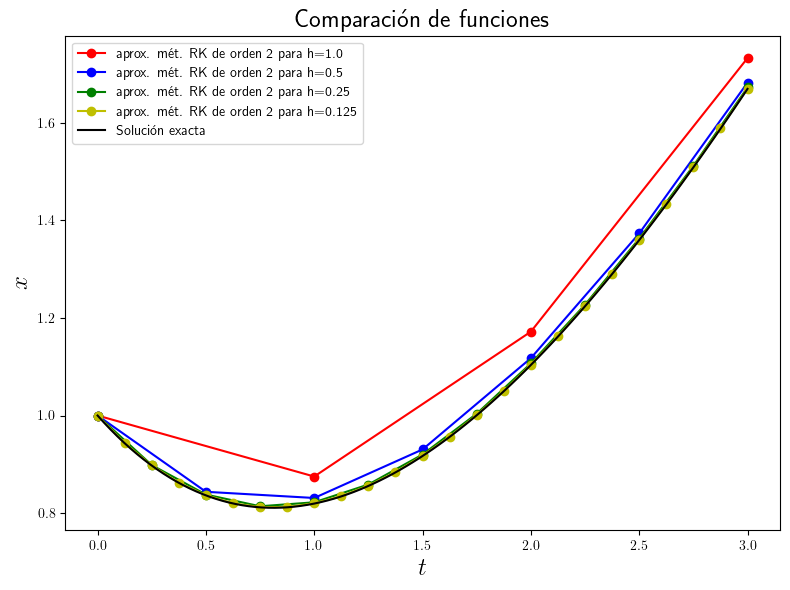

In [11]:
# Usamos las herramientas previamente programadas

# Como h = (b-a)/N = 3/N para el problema definiendo N definiremos h
N = []
N.append(3)  # Para h=1
N.append(6)  # Para h=1/2
N.append(12) # Para h=1/4
N.append(24) # Para h=1/8

alpha = 3/4
beta = 2/3

num_puntos = 100 # Puntos para graficar la solución exacta

# Calculo la solución exacta:
t_values_exac, x_values_exac, sol_exacta_np = solucion_exacta(f,a,b,mu,num_puntos)

# Calculo las aproximaciones
print(Title(f"Prueba de la función de Runge-Kutta de orden 2: "))

graficas = []
i=0
styles = ['ro-', 'bo-', 'go-', 'yo-', 'mo-'] # Se pueden añadir más si se quieren probar más N

for i in range(len(N)):
	n=N[i]
	t_values_RK2 , x_values_RK2 = RK2(f,a,b,mu,n,alpha=alpha,beta=beta)
	x_values_exac_N = sol_exacta_np(t_values_RK2)
	print(f"\nMétodo de Runge-Kutta de orden 2 para h = {3/n}: ")
	print(f"{x_values_RK2}")
	print(f"\tError cuadrático medio: {ECM(x_values_exac_N, x_values_RK2)}")
	print(f"\tMáximo error absoluto: {MEA(x_values_exac_N, x_values_RK2)}\n")
  
	graficas.append({"x_values" : t_values_RK2,
					"y_values" : x_values_RK2,
					"label" : f"aprox. mét. RK de orden 2 para h={3/n}",
					"style": styles[i]})

# print(f"\nSolución exacta: ")
# print(f"{sol_exacta_np(t_values_RK2)}\n")

graficas.append({"x_values" : t_values_exac,
             "y_values" : x_values_exac,
             "label" : "Solución exacta",
             "style": 'k'})

grafica_comparativa(graficas, 8, 6)

Comparando los ECMs, y los MEAs se puede ver que cuanto menor es h mejor es la aproximación. En la gráfica se aprecia perfectamente.

#### Apartado 2

Prueba de la función de Runge-Kutta clásico: 

Método de Runge-Kutta clásico para h = 1.0: 
[1.         0.8203125  1.10451253 1.67018599]
	Error cuadrático medio: 4.790567234487523e-07
	Máximo error absoluto: 0.0008742090377562572


Método de Runge-Kutta clásico para h = 0.5: 
[1.         0.83642578 0.81962848 0.9171423  1.1036826  1.35955749
 1.66943076]
	Error cuadrático medio: 1.3056688692000142e-09
	Máximo error absoluto: 4.42747059188342e-05


Método de Runge-Kutta clásico para h = 0.25: 
[1.         0.89749146 0.83640367 0.81186958 0.81959403 0.85578655
 0.91710206 1.00058853 1.10364082 1.22395988 1.35951682 1.50852114
 1.66939275]
	Error cuadrático medio: 4.267668099053861e-12
	Máximo error absoluto: 2.4922515280412227e-06


Método de Runge-Kutta clásico para h = 0.125: 
[1.         0.94323921 0.89749075 0.86208742 0.83640243 0.81984698
 0.81186794 0.81194569 0.8195921  0.8343486  0.85578442 0.88349487
 0.9170998  0.95624208 1.00058621 1.04981703 1.10363847 1.16177241
 1.2239575

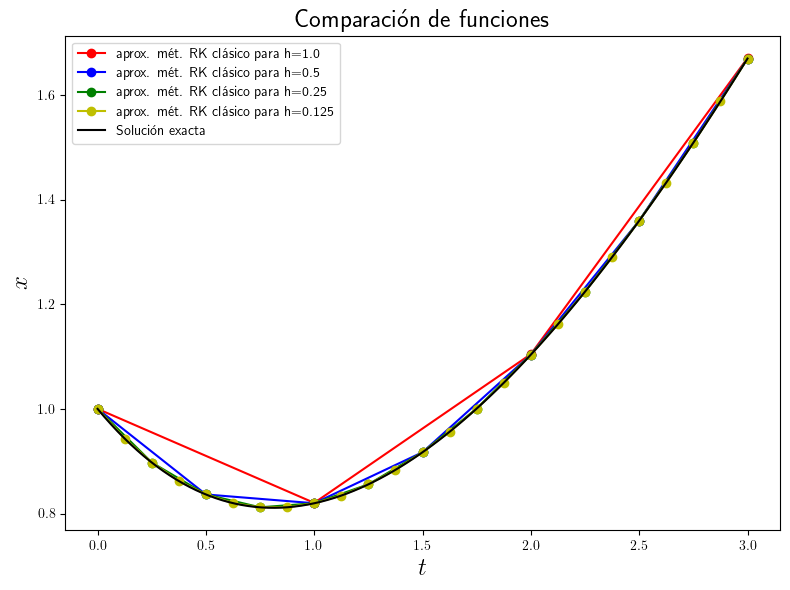

In [12]:
# Repetimos pero usando RK4

# Como h = (b-a)/N = 3/N para el problema definiendo N definiremos h
N = []
N.append(3)  # Para h=1
N.append(6)  # Para h=1/2
N.append(12) # Para h=1/4
N.append(24) # Para h=1/8

num_puntos = 100 # Puntos para graficar la solución exacta

# Calculo la solución exacta:
t_values_exac, x_values_exac, sol_exacta_np = solucion_exacta(f,a,b,mu,num_puntos)

# Calculo las aproximaciones
print(Title(f"Prueba de la función de Runge-Kutta clásico: "))

graficas = []
i=0
styles = ['ro-', 'bo-', 'go-', 'yo-', 'mo-'] # Se pueden añadir más si se quieren probar más N

for i in range(len(N)):
	n=N[i]
	t_values_RK2 , x_values_RK2 = RK4(f,a,b,mu,n)
	x_values_exac_N = sol_exacta_np(t_values_RK2)
	print(f"\nMétodo de Runge-Kutta clásico para h = {3/n}: ")
	print(f"{x_values_RK2}")
	print(f"\tError cuadrático medio: {ECM(x_values_exac_N, x_values_RK2)}")
	print(f"\tMáximo error absoluto: {MEA(x_values_exac_N, x_values_RK2)}\n")
  
	graficas.append({"x_values" : t_values_RK2,
					"y_values" : x_values_RK2,
					"label" : f"aprox. mét. RK clásico para h={3/n}",
					"style": styles[i]})

# print(f"\nSolución exacta: ")
# print(f"{sol_exacta_np(t_values_RK2)}\n")

graficas.append({"x_values" : t_values_exac,
             "y_values" : x_values_exac,
             "label" : "Solución exacta",
             "style": 'k'})

grafica_comparativa(graficas, 8, 6)

Se observa de nuevo el fenómeno anterior (muy visible en la gráfica)

### Ejercicio 7

Implemente un método MML Predictor-Corrector combinando un predictor AB de 5 pasos con un corrector AM de 4, y aplicando una sólo corrección en cada iteración:
$$
P: \qquad x_{n+5}^{(0)} = x_{n+4} + \frac{h}{720} (1901 f_{n+4} -2774 f_{n+3} +2616 f_{n+2} - 1274 f_{n+1} + 251 f_n)
$$
$$
C^1: \qquad  x_{n+5} = x_{n+4} + \frac{h}{720} (251 f(t_{n+5},x_{n+5}^{(0)}) + 646 f_{n+4} -264 f_{n+3} +106 f_{n+2} - 19 f_{n+1} )
$$

In [13]:
def predictor_corrector_Ej7(f, a, b, x0, x1, x2, x3, x4, N):
    """
    Método predictor-corrector de orden 5 para resolver la ecuación diferencial
    x' = f(t,x) con condiciones iniciales x0, x1, x2 en el intervalo [a,b]
    con N pasos.
    Utilizamos el método de Adam-Bashforth de orden 2 para la predicción
    y el método de Simpson para la corrección.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros(N + 1)
    
    x[0] = x0
    x[1] = x1
    x[2] = x2
    x[3] = x3
    x[4] = x4
    
    # Predicción, usaremos la fórmula abierta de 4 pasos:
    for n in range(N-4):
        
        # Predicción:
        x[n + 5] = x[n+4] + (h/720)*(1901*f(t[n+4],x[n+4])-2774*f(t[n+3],x[n+3]) + 2616*f(t[n+2],x[n+2]) - 1274*f(t[n+1],x[n+1]) + 251*f(t[n],x[n]))

        # Corrección: (como solo es una no hace falta hacer bucle)
        x[n + 5] = x[n+4] + (h/720)*(251*f(t[n+5],x[n+5]) + 646*f(t[n+4],x[n+4]) - 264*f(t[n+3],x[n+3]) + 106*f(t[n+2],x[n+2]) - 19*f(t[n+1],x[n+1]))

    return t, x

Prueba del método Predictor Corrector: 
[1.         0.88212393 0.82245466 0.81288445 0.84643491 0.91710046
 1.01971034 1.149815   1.30358465 1.47772294 1.66939271]
	Error cuadrático medio: 0.008507245104484537
	Máximo error absoluto: 0.19166753620779198


Solución exacta: 
[1.         0.87277851 0.8162606  0.81959198 0.87358469 0.97046129
 1.10363832 1.26754301 1.45745808 1.66939048]



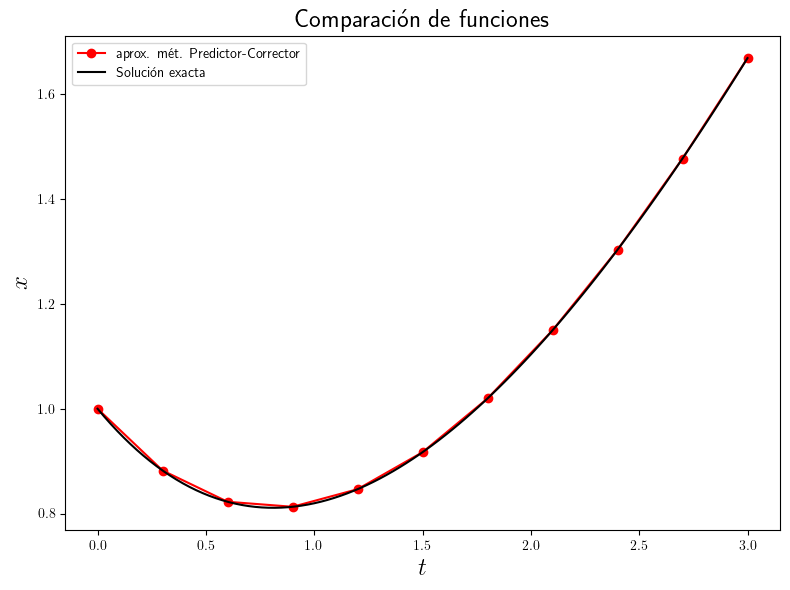

In [14]:
# Lo probamos en el mismo ejemplo que llevamos trabajando toda la práctica:

# Definimos el problema 
a,b = 0,3   # Extremos inferior y superior del intervalo
mu = 1      # Condición inicial del PVI  

# Definimos la función f
def f(t,x):
    return (t-x)/2

N = 10
h = (b-a)/N
num_puntos = 100 # Solo para dibujar la solución exacta

# Calculo la solución exacta:
t_values_exac, x_values_exac, sol_exacta_np = solucion_exacta(f,a,b,mu,num_puntos)
x_values_exac_N = sol_exacta_np(np.linspace(a,b,N))

# Calculamos x0, x1, x2, x3, x4 (a partir de la solución exacta)
x0 = sol_exacta_np(a)
x1 = sol_exacta_np(a+h)
x2 = sol_exacta_np(a+2*h)
x3 = sol_exacta_np(a+3*h)
x4 = sol_exacta_np(a+4*h)

# Calculamos la aproximación del método predictor corrector:
t_values_PC , x_values_PC = predictor_corrector_Ej7(f, a, b, x0, x1, x2, x3, x4, N)

print(Title(f"Prueba del método Predictor Corrector: "))

print(f"{x_values_PC}")
print(f"\tError cuadrático medio: {ECM(x_values_exac_N, x_values_PC)}")
print(f"\tMáximo error absoluto: {MEA(x_values_exac_N, x_values_PC)}\n")

print(f"\nSolución exacta: ")
print(f"{x_values_exac_N}\n")

PC = {"x_values" : t_values_PC,
             "y_values" : x_values_PC,
             "label" : "aprox. mét. Predictor-Corrector",
             "style": 'ro-'}


exacta = {"x_values" : t_values_exac,
             "y_values" : x_values_exac,
             "label" : "Solución exacta",
             "style": 'k'}

grafica_comparativa([PC, exacta], 8, 6)



### Ejercicio 9

ado el siguiente PVI definido para $t\in[0,1]$:
$$\left\{\begin{array}{rcl}
x'(t) &=& \cos(x(t)) + t^2 \\
x(0) &=& 1
\end{array}\right.
$$
- Intente encontrar la solución exacta del PVI.
- Aproxime numéricamente el PVI utilizando los métodos que considere y represente gráficamente las diferentes aproximaciones en el intervalo $[0,1]$.
- Para el método que observe que devuelve mejores resultados, estudie su sensibilidad a distintos valores de $N$ (por tanto de $h$).

In [15]:
# Definimos el problema

# Dunción numérica
def f(x,t):
	return np.cos(x) + t**2

a,b = 0,1
mu=1

#### Apartado 1

Resultado del cálculo de la solución exacta:


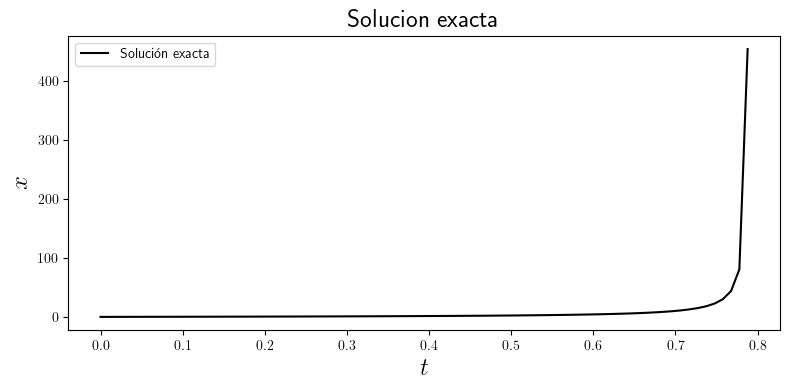

In [16]:
# Importamos el módulo para solucionar ivp (initial value problem)
from scipy.integrate import solve_ivp


# Calculo la solución exacta (no nos sirve la función anterior ya que esta tiene un coseno y un t^2)

num_puntos = 100 # Número de puntos para la solución exacta (dibujar solo)


sol = solve_ivp(f, t_span=(a, b), y0=[mu], t_eval=np.linspace(a,b,num_puntos))

# Extraemos las soluciones
t_values_exac, x_values_exac = sol.t, sol.y[0]

exacta = {"x_values" : t_values_exac,
						"y_values" : x_values_exac,
						"label" : "Solución exacta",
						"style": 'k'}

print(f"Resultado del cálculo de la solución exacta:")
grafica_comparativa([exacta], title="Solucion exacta")


#### Apartado 2

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_45622/639309800.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[0] = x0
/tmp/ipykernel_45622/639309800.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[1] = x1
/tmp/ipykernel_45622/639309800.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation

Comparación de ECMs y MEAs: 

	Método de Euler explícito:
		Error cuadrático medio: 5.264111539074891
		Máximo error absoluto: 6.222877786245218

	Método de Euler implícito:
		Error cuadrático medio: 5.117749383367599
		Máximo error absoluto: 6.076547034055495

	Método de Euler mejorado:
		Error cuadrático medio: 0.8771837305607032
		Máximo error absoluto: 2.6132697866179875

	Método de Euler modificado:
		Error cuadrático medio: 0.5995144087100345
		Máximo error absoluto: 2.1660634761592465

	Método de Runge-Kutta de orden 2:
		Error cuadrático medio: 0.7818502462617302
		Máximo error absoluto: 2.46917728055419

	Método de Runge-Kutta de orden 4:
		Error cuadrático medio: 0.0013953570088623332
		Máximo error absoluto: 0.10538277692345943

	Método Predictor-Corrector:
		Error cuadrático medio: nan
		Máximo error absoluto: inf



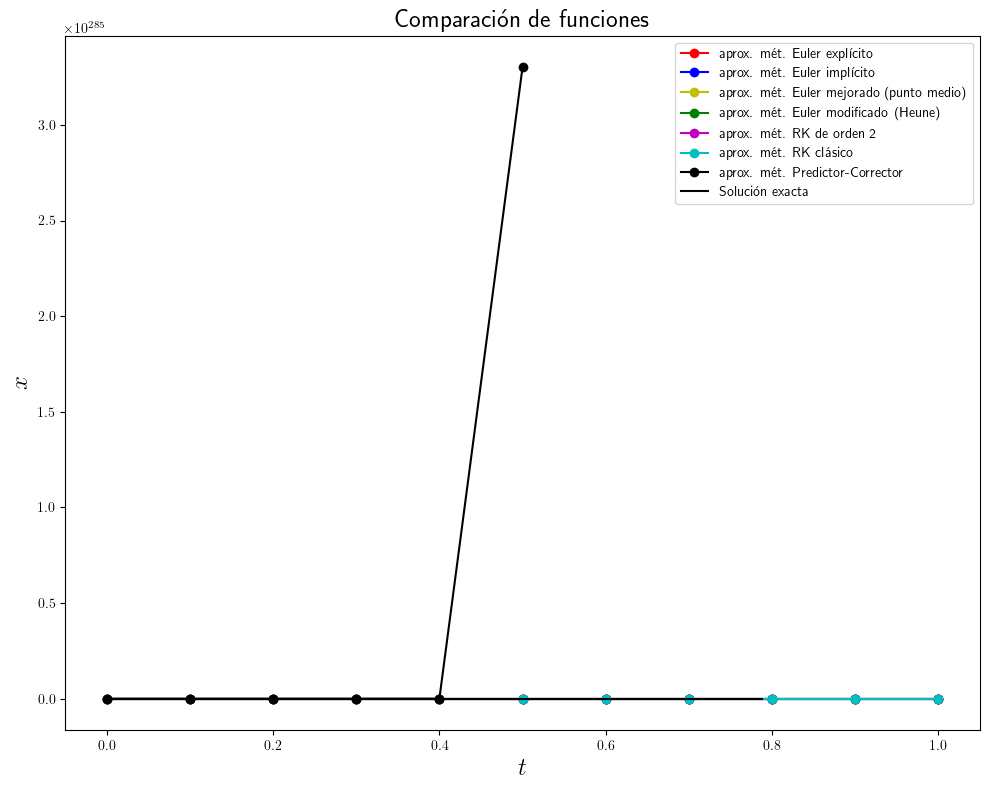

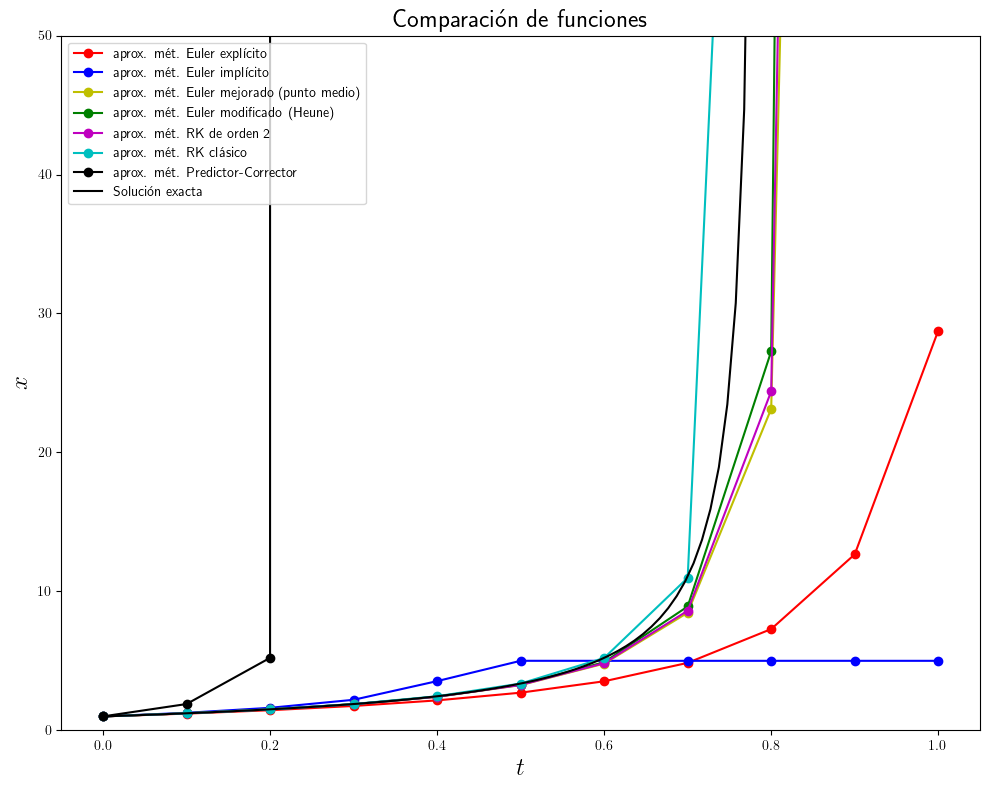

In [17]:
# Vamos a probar con todos los métodos que tenemos hasta ahora:
N = 10 # Ponemos un número de nodos relativamente bajo

# Euler
t_values_Eulerexpl, x_values_Eulerexpl = euler_explicito(f,a,b,mu,N)
t_values_Eulerimpl, x_values_Eulerimpl = euler_implicito(f,a,b,mu,N)
t_values_Eulermej, x_values_Eulermej = euler_mejorado(f,a,b,mu,N)
t_values_Eulermod, x_values_Eulermod = euler_modificado(f,a,b,mu,N)

# Runge-Kutta
t_values_RK2 , x_values_RK2 = RK2(f,a,b,mu,N,alpha=alpha,beta=beta)
t_values_RK4 , x_values_RK4 = RK4(f,a,b,mu,N)

# Predictor-Corrector

# Calculamos la solución exacta para evaluarla:
f_sol = solve_ivp(f, t_span=(a, b), y0=[mu], dense_output=True)

# Calculamos x0, x1, x2, x3, x4 (a partir de la solución exacta)
x0 = f_sol.sol(a)
x1 = f_sol.sol(a+h)
x2 = f_sol.sol(a+2*h)
x3 = f_sol.sol(a+3*h)
x4 = f_sol.sol(a+4*h)

t_values_PC , x_values_PC = predictor_corrector_Ej7(f, a, b, x0, x1, x2, x3, x4, N)


# Calculamos el exacto pero solo con N nodos
sol_N = solve_ivp(f, t_span=(a, b), y0=[mu], t_eval=np.linspace(a,b,N+1))

# Extraemos las soluciones
t_values_exac_N, x_values_exac_N = sol_N.t, sol_N.y[0]

graficas = []

graficas.append({ "x_values" : t_values_Eulerexpl,
									"y_values" : x_values_Eulerexpl,
									"label" : "aprox. mét. Euler explícito",
									"style": 'ro-'})

graficas.append({ "x_values" : t_values_Eulerimpl,
									"y_values" : x_values_Eulerimpl,
									"label" : "aprox. mét. Euler implícito",
									"style": 'bo-'})

graficas.append({ "x_values" : t_values_Eulermej,
									"y_values" : x_values_Eulermej,
									"label" : "aprox. mét. Euler mejorado (punto medio)",
									"style": 'yo-'})

graficas.append({ "x_values" : t_values_Eulermod,
									"y_values" : x_values_Eulermod,
									"label" : "aprox. mét. Euler modificado (Heune)",
									"style": 'go-'})

graficas.append({ "x_values" : t_values_RK2,
									"y_values" : x_values_RK2,
									"label" : "aprox. mét. RK de orden 2",
									"style": 'mo-'})
graficas.append({ "x_values" : t_values_RK4,
									"y_values" : x_values_RK4,
									"label" : "aprox. mét. RK clásico",
									"style": 'co-'})

graficas.append({ "x_values" : t_values_PC,
									"y_values" : x_values_PC,
									"label" : "aprox. mét. Predictor-Corrector",
									"style": 'ko-'})

graficas.append(exacta)

# Presentación de resultados:

print(Title(f"Comparación de ECMs y MEAs: \n"))

print(f"\tMétodo de Euler explícito:")
print(f"\t\tError cuadrático medio: {ECM(x_values_exac_N, x_values_Eulerexpl)}")
print(f"\t\tMáximo error absoluto: {MEA(x_values_exac_N, x_values_Eulerexpl)}\n")

print(f"\tMétodo de Euler implícito:")
print(f"\t\tError cuadrático medio: {ECM(x_values_exac_N, x_values_Eulerimpl)}")
print(f"\t\tMáximo error absoluto: {MEA(x_values_exac_N, x_values_Eulerimpl)}\n")

print(f"\tMétodo de Euler mejorado:")
print(f"\t\tError cuadrático medio: {ECM(x_values_exac_N, x_values_Eulermej)}")
print(f"\t\tMáximo error absoluto: {MEA(x_values_exac_N, x_values_Eulermej)}\n")

print(f"\tMétodo de Euler modificado:")
print(f"\t\tError cuadrático medio: {ECM(x_values_exac_N, x_values_Eulermod)}")
print(f"\t\tMáximo error absoluto: {MEA(x_values_exac_N, x_values_Eulermod)}\n")

print(f"\tMétodo de Runge-Kutta de orden 2:")
print(f"\t\tError cuadrático medio: {ECM(x_values_exac_N, x_values_RK2)}")
print(f"\t\tMáximo error absoluto: {MEA(x_values_exac_N, x_values_RK2)}\n")

print(f"\tMétodo de Runge-Kutta de orden 4:")
print(f"\t\tError cuadrático medio: {ECM(x_values_exac_N, x_values_RK4)}")
print(f"\t\tMáximo error absoluto: {MEA(x_values_exac_N, x_values_RK4)}\n")

print(f"\tMétodo Predictor-Corrector:")
print(f"\t\tError cuadrático medio: {ECM(x_values_exac_N, x_values_PC)}")
print(f"\t\tMáximo error absoluto: {MEA(x_values_exac_N, x_values_PC)}\n")

# El dibujo entero
grafica_comparativa(graficas, 10,8)

# La acoto para verla más de cerca
grafica_comparativa(graficas, 10,8, y_min=0, y_max=50)



#### Apartado 3

[25, 50, 100, 200]
Prueba de la función de Runge-Kutta de orden 2: 
25

Método de Runge-Kutta de orden 4 para h = 0.04: 
[1.00000000e+00 1.08336877e+00 1.17422811e+00 1.27391448e+00
 1.38411016e+00 1.50696047e+00 1.64524196e+00 1.80260992e+00
 1.98397218e+00 2.19607143e+00 2.44842587e+00 2.75491456e+00
 3.13658954e+00 3.62698613e+00 4.28296986e+00 5.20926864e+00
 6.62218112e+00 9.05175647e+00 1.42298797e+01 3.26576773e+01
 1.07195182e+03 1.91314271e+23            inf            inf
            inf            inf]
50

Método de Runge-Kutta de orden 4 para h = 0.02: 
[1.00000000e+00 1.04082053e+00 1.08336876e+00 1.12778558e+00
 1.17422810e+00 1.22287204e+00 1.27391447e+00 1.32757709e+00
 1.38411016e+00 1.44379718e+00 1.50696048e+00 1.57396809e+00
 1.64524201e+00 1.72126837e+00 1.80261005e+00 1.88992233e+00
 1.98397248e+00 2.08566474e+00 2.19607209e+00 2.31647739e+00
 2.44842725e+00 2.59380322e+00 2.75491747e+00 2.93464328e+00
 3.13659590e+00 3.36538834e+00 3.62700075e+00 3.92932700e+00
 

/tmp/ipykernel_45622/2927439887.py:5: RuntimeWarning: overflow encountered in scalar power
  return np.cos(x) + t**2


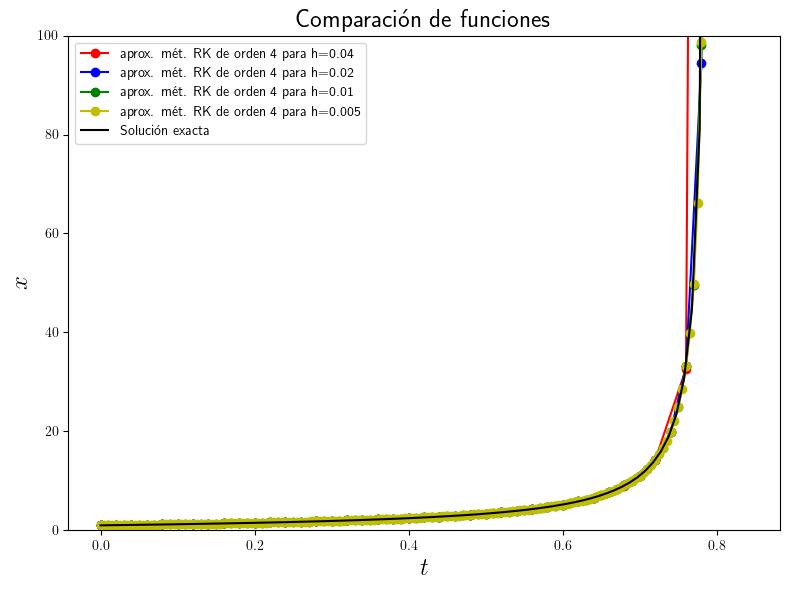

In [18]:
# En el apartado anterior se ha observado que las funciones tienen comportamientos extraños debido a la divergencia de la solución. Aún Así la que mejor se ajusta mirando solo el ECM y el MEA es Runge-Kutta de orden 4. Analicemos pues esta función 

# Definiremos varios valores de N (que lo serán para h)
N = []
N.append(25) 
N.append(50) 
N.append(100) 
N.append(200) 

print(N)

# Calculo las aproximaciones
print(Title(f"Prueba de la función de Runge-Kutta de orden 2: "))

styles = ['ro-', 'bo-', 'go-', 'yo-', 'mo-'] # Se pueden añadir más si se quieren probar más N
graficas = []

for i in range(len(N)):
	n=N[i]

	print(n)

	t_values_RK4 , x_values_RK4 = RK4(f,a,b,mu,n)

	print(f"\nMétodo de Runge-Kutta de orden 4 para h = {(b-a)/n}: ")
	print(f"{x_values_RK4}")
  
	graficas.append({"x_values" : t_values_RK4,
					"y_values" : x_values_RK4,
					"label" : f"aprox. mét. RK de orden 4 para h={(b-a)/n}",
					"style": styles[i]})


graficas.append({"x_values" : t_values_exac,
             "y_values" : x_values_exac,
             "label" : "Solución exacta",
             "style": 'k'})

grafica_comparativa(graficas, 8, 6, y_max = 100, y_min=0)

Se puede observar que se adecua bastante bien a la función aunque conforme va tendiendo a infinto, los menores valores de h se mantienen más fieles a la solución "exacta"